In [30]:
from urllib2 import Request, urlopen, URLError
from xml.etree import ElementTree
#from pyraf import iraf # need to have a login.cl in starting directory!
import os, sys
import numpy as np
from numpy import *
import astropy.io.ascii as ascii
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
%matplotlib inline
from matplotlib.patches import Circle
from astropy.io import fits

# Get the inputs

### ra, dec
### set phot aperture
### choose file type

In [4]:
instr = fits.open("M35_superstamp.fits",mode='readonly',memmap=True)
table = instr[1].data[:]
pixels = table['FLUX']

In [32]:
from astropy import wcs
image = fits.getdata('M35_superstamp.fits')

In [33]:
hdu = fits.open('M35_superstamp.fits')[0]

In [34]:
fig = plt.figure()

In [35]:
ax = fig.add_subplot(1, 1, 1, projection=wcs.WCS(hdu.header))

In [36]:
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.show()

In [37]:
plt.show()

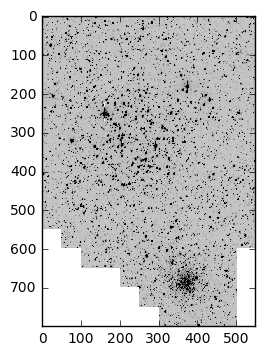

In [29]:
plt.imshow(image,cmap=cm.gray_r,vmin=0,vmax=2000,interpolation='nearest')

In [18]:
ax.imshow(image,cmap=cm.gray_r,vmin=0,vmax=1000,interpolation='nearest')

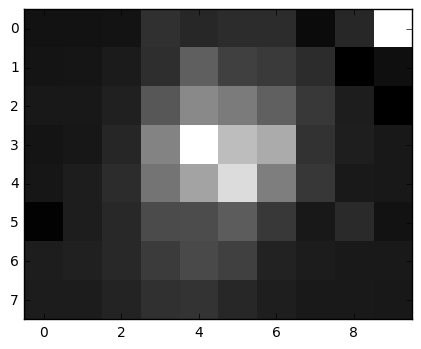

In [63]:
plt.clf()
colmap = plt.get_cmap('gray')
plt.imshow(pixels[100], cmap=colmap,interpolation='nearest')

In [170]:
file = 'K2SN.fits'
instr = fits.open(file,mode='readonly',memmap=True)
table = instr[1].data[:]
pixels = table['FLUX']
times = table['TIME']
cadences = table['CADENCENO']
quality = table['QUALITY']

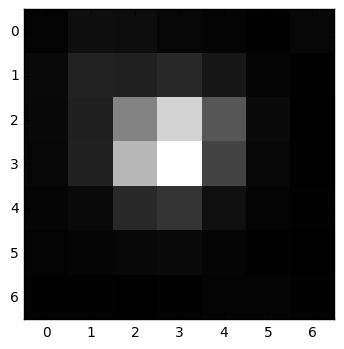

In [113]:
xloc = xpos[1500]
yloc = ypos[1500]
circ = Circle([xloc,yloc],3,facecolor='None', edgecolor = 'red', alpha=0.5, linewidth = 3.5)
circ1 = Circle([instr[1].header['1CRPX5']-1.,instr[1].header['2CRPX5']-1.],0.25, facecolor='green', edgecolor='black',alpha=0.5,linewidth=2)
plt.imshow(pixels[100], cmap=colmap,interpolation='nearest')

In [68]:
lightcurve = np.array([],'float32')
uncert = np.array([],'float32')
xpos = np.array([],'float32')
ypos = np.array([],'float32')

3853

In [53]:
star = '220162982'
tbl = Table.read('Lightcurves_public/ktwo'+star+'-c0'+campaign+'_llc.fits')
date = tbl['TIME']
flux = tbl['SAP_FLUX']
quality = tbl['SAP_QUALITY']
xpsf = tbl['PSF_CENTR1']
ypsf = tbl['PSF_CENTR2']
xmom = tbl['MOM_CENTR1']
ymom = tbl['MOM_CENTR2']
pdcflux = tbl['PDCSAP_FLUX']

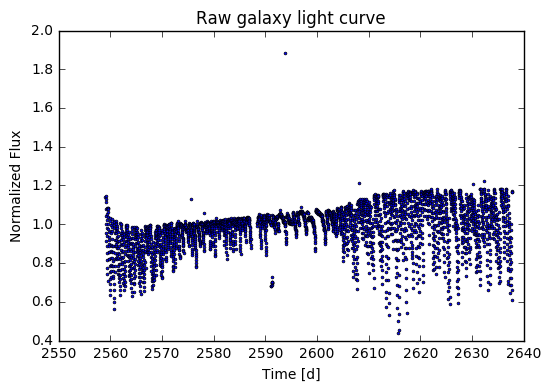

In [55]:
good = np.where(quality != 1048576) 
plt.plot(date[good],flux[good]/np.nanmedian(flux[good]),'bo',markersize=2.)
plt.xlabel('Time [d]')
plt.ylabel('Normalized Flux')
plt.title('Raw galaxy light curve')

### Remove thruster firings

In [26]:
good = np.where(quality != 1048576) 

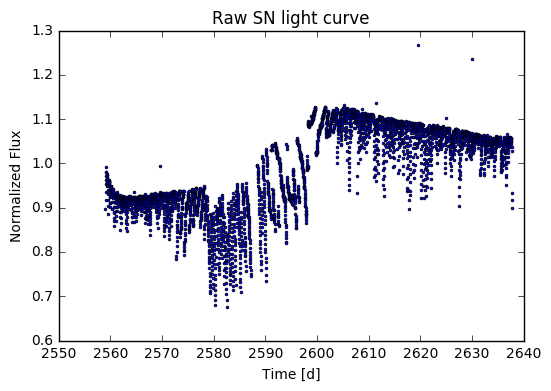

In [35]:
plt.plot(date[good],flux[good]/np.nanmedian(flux[good]),'bo',markersize=2.)
plt.xlabel('Time [d]')
plt.ylabel('Normalized Flux')
plt.title('Raw SN light curve')

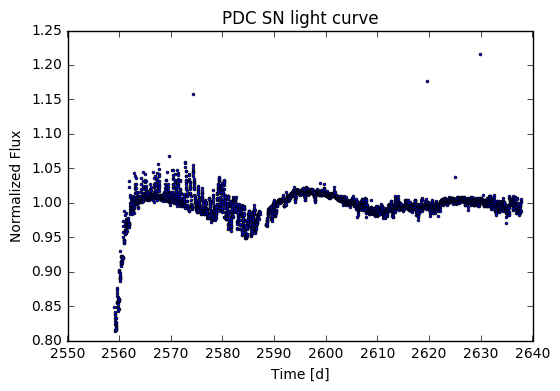

In [36]:
plt.plot(date[good],pdcflux[good]/np.nanmedian(pdcflux[good]),'bo',markersize=2.)
plt.xlabel('Time [d]')
plt.ylabel('Normalized Flux')
plt.title('PDC SN light curve')

In [20]:
tbl.colnames

['TIME',
 'TIMECORR',
 'CADENCENO',
 'SAP_FLUX',
 'SAP_FLUX_ERR',
 'SAP_BKG',
 'SAP_BKG_ERR',
 'PDCSAP_FLUX',
 'PDCSAP_FLUX_ERR',
 'SAP_QUALITY',
 'PSF_CENTR1',
 'PSF_CENTR1_ERR',
 'PSF_CENTR2',
 'PSF_CENTR2_ERR',
 'MOM_CENTR1',
 'MOM_CENTR1_ERR',
 'MOM_CENTR2',
 'MOM_CENTR2_ERR',
 'POS_CORR1',
 'POS_CORR2']

## Get cotrending basis vectors

In [15]:
url = 'https://archive.stsci.edu/missions/k2/cbv/ktwo-c0'+campaign+'-d11_lcbv.fits'
wget.download(url)

'ktwo-c08-d11_lcbv.fits'

In [138]:
cbvs = fits.open('ktwo-c0'+campaign+'-d11_lcbv.fits')

In [154]:
cbvs[25].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   80 / length of first array dimension                
NAXIS2  =                 3853 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   19 / number of table fields                         
TTYPE1  = 'TIME_MJD'           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'MJD, days'          / column units: Modified Julian Date             
TDISP1  = 'D17.7   '           / column display format                          
TTYPE2  = 'CADENCENO'       

In [172]:
channel = instr[0].header['CHANNEL']
channel

25

In [156]:
time = cbvs[25].data['TIME_MJD']
vector1 = cbvs[25].data['VECTOR_1']
vector2 = cbvs[25].data['VECTOR_2']
vector3 = cbvs[25].data['VECTOR_3']
vector4 = cbvs[25].data['VECTOR_4']

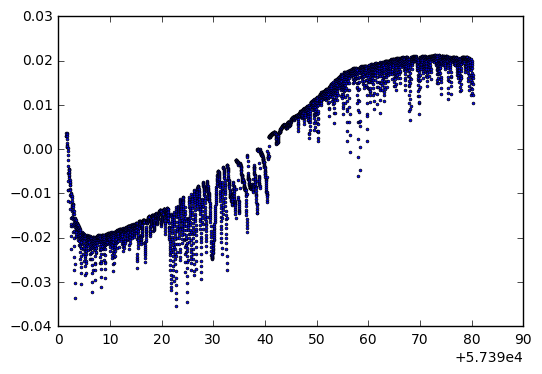

In [157]:
plt.plot(time,vector1,'bo',markersize=2.)

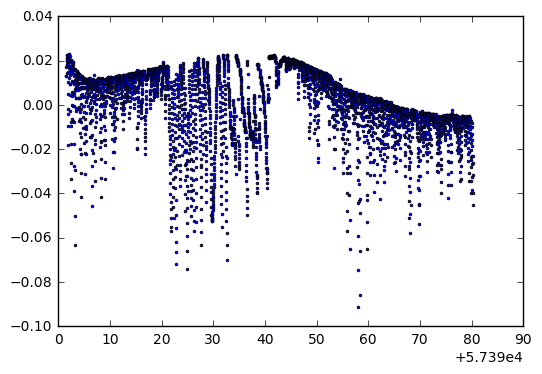

In [158]:
plt.plot(time,vector2,'bo',markersize=2.)

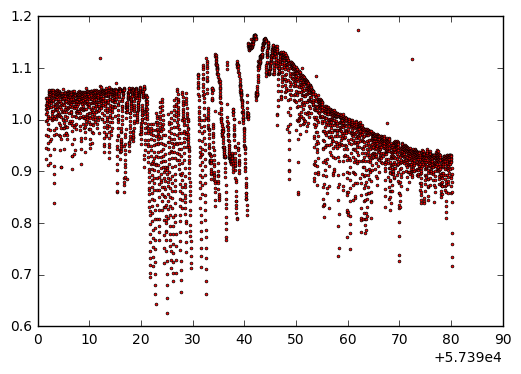

In [196]:
plt.plot(time[good],flux[good]/np.nanmedian(flux[good])-5.*vector1[good]+3.*vector2[good],'ro',markersize=2)